In [5]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting data
from sklearn.model_selection import train_test_split 

# Scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

# Classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
# time stamp for purpose of timing runtime of models
import time

# Table of contents

[Misc ML Modeling](#misc)

[Outside Hitter Modeling](#oh)

[Opposite Hitter Modeling](#opp)

[Setter Modeling](#set)

[Middle Blocker Modeling](#mb)

[Libero Modeling](#lib)

# Misc ML model testing <a class="anchor" id ="misc"></a>


### Tested the dataset that included school height and all the positions together

In [6]:
vbox_ml = pd.read_csv('ml_volleyball_dataframe_minimal').drop(columns = ['Unnamed: 0'])

In [321]:
vbox_ml['Pro'].mean() #get the mean of the trues in the pro column

0.14566929133858267

In [323]:
print(0.14566929133858267 - 1) # subtract by 1 to get the mean of false for pro

-0.8543307086614174


### There is a 85.433 percent chance of guessing correctly by just guessing they aren't pro.

In [9]:
vbox_ml

,Height_cm,Pro,Position_Libero,Position_Middle-blocker,Position_Opposite,Position_Outside Hitter,Position_Setter,School_ PFW,School_BYU,School_Ball State,...,School_Pepperdine,School_Princeton,School_SFU,School_Stanford,School_UCI,School_UCLA,School_UCSB,School_UCSD,School_UH,School_USC
0,201.00,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,195.58,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,195.58,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,203.20,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,188.00,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5583,203.00,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5584,197.00,True,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5585,211.00,True,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5586,195.00,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X = vbox_ml.drop(columns = ['Pro']) # independent variables or features
y = vbox_ml['Pro'] # dependent variable or target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

# Check 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4191, 33) (1397, 33) (4191,) (1397,)


In [12]:
# Instantiate the scaler
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_train_ss = SS.fit_transform(X_train)
X_test_ss = SS.transform(X_test)

In [13]:
# Instantiate the scaler
MM = MinMaxScaler()

# Fit the scaler and transform both data subsets
# we can fit and transform 'X_train' in the same step
X_train_mm = MM.fit_transform(X_train)
X_test_mm = MM.transform(X_test)

# Log Reg

### Finding the best parameters

In [14]:
# The C_values to try
C_values = np.logspace(-4,4,50)

# Empty lists to append train and test accuracy scores to 
train_acc = {}
test_acc = {}
best_model = None
best_score = -np.inf
best_data = None

# loop over datasets
for train_data,test_data,key in [(X_train,X_test,"raw"),
                                 (X_train_mm,X_test_mm,"MM"),
                                 (X_train_ss,X_test_ss,"SS")]:
    train_results = []
    test_results = []
    for C in C_values:

        # Instantiate the model
        lr = LogisticRegression(C=C,max_iter=10000)

        # Fit the model 
        lr.fit(train_data,y_train)

        # Score the model 
        train_score = lr.score(train_data,y_train)
        test_score = lr.score(test_data,y_test)
        train_results.append(train_score)
        test_results.append(test_score)
        if test_score > best_score:
            best_score = test_score
            best_model = lr
            best_data = key
    train_acc[key] = train_results
    test_acc[key] = test_results


### Model didnt make much of a difference in accuracy

In [15]:
print("Best_Model: data={} score={:.3f} C={:.5f}".format(best_data,best_score,best_model.get_params()["C"]))

Best_Model: data=raw score=0.856 C=16.76833


In [16]:
test_df = pd.DataFrame(test_acc,index=C_values).add_prefix("test_")
train_df = pd.DataFrame(train_acc,index=C_values).add_prefix("train_")
lr_results = pd.concat([train_df,test_df],axis=1)
lr_results

,train_raw,train_MM,train_SS,test_raw,test_MM,test_SS
0.000100,0.854211,0.854211,0.854211,0.854689,0.854689,0.854689
0.000146,0.854211,0.854211,0.854211,0.854689,0.854689,0.854689
0.000212,0.854211,0.854211,0.854211,0.854689,0.854689,0.854689
0.000309,0.854211,0.854211,0.854211,0.854689,0.854689,0.854689
0.000450,0.854211,0.854211,0.854211,0.854689,0.854689,0.854689
0.000655,0.854211,0.854211,0.854211,0.854689,0.854689,0.854689
0.000954,0.854211,0.854211,0.854211,0.854689,0.854689,0.854689
0.001389,0.854211,0.854211,0.854211,0.854689,0.854689,0.854689
0.002024,0.854211,0.854211,0.854211,0.854689,0.854689,0.854689
0.002947,0.854211,0.854211,0.854211,0.854689,0.854689,0.854689


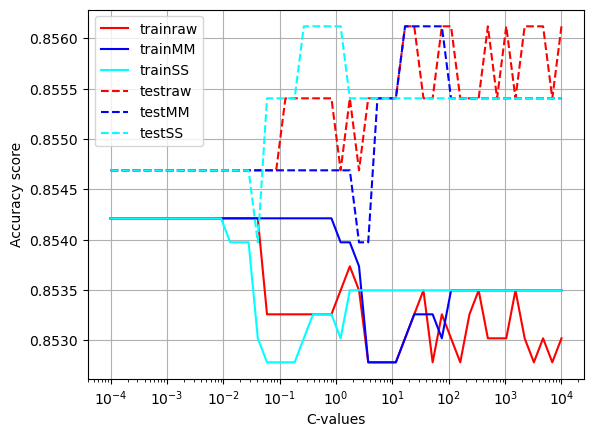

In [17]:
# visualize accuracies for different C-values
color_map = {"raw":'red',
             "MM":"blue",
             "SS":"cyan"}
plt.figure()
for key,vlist in train_acc.items():
    plt.plot(C_values, vlist,  color=color_map[key],label='train'+key)
for key,vlist in test_acc.items():
    plt.plot(C_values, vlist, ls="--", color=color_map[key],label='test'+key)
plt.xscale('log')
plt.xlabel('C-values')
plt.ylabel('Accuracy score')
plt.legend()
plt.grid()
plt.show()

### The accuracy for logistic regression is basically the same as guessing.

### The reason for that is the way I filled in the null values for my data, I need to find a better way than just the average.

# KNN

### Finding the best parameters 

In [18]:
# The C_values to try
NN_values = np.arange(1,vbox_ml.shape[0]//8,2)

# Empty lists to append train and test accuracy scores to 
train_acc = {}
test_acc = {}
best_model = None
best_score = -np.inf
best_data = None

# loop over datasets
for train_data,test_data,key in [(X_train,X_test,"raw"),
                                 (X_train_mm,X_test_mm,"MM"),
                                 (X_train_ss,X_test_ss,"SS")]:
    train_results = []
    test_results = []
    for NN in NN_values:

        # Instantiate the model
        nn = KNeighborsClassifier(n_neighbors=NN)
        # Fit the model 
        nn.fit(train_data,y_train)

        # Score the model 
        train_score = nn.score(train_data,y_train)
        test_score = nn.score(test_data,y_test)
        train_results.append(train_score)
        test_results.append(test_score)
        if test_score > best_score:
            best_score = test_score
            best_model = nn
            best_data = key
    train_acc[key] = train_results
    test_acc[key] = test_results

In [19]:
print("Best_Model: data={} score={:.3f} NN={:.5f}".format(best_data,best_score,best_model.get_params()["n_neighbors"]))

Best_Model: data=raw score=0.865 NN=9.00000


### Essentialy the same accuracy score 

In [20]:
test_df = pd.DataFrame(test_acc,index=NN_values).add_prefix("test_")
train_df = pd.DataFrame(train_acc,index=NN_values).add_prefix("train_")
nn_results = pd.concat([train_df,test_df],axis=1)
nn_results

,train_raw,train_MM,train_SS,test_raw,test_MM,test_SS
1,0.800764,0.800764,0.871868,0.743021,0.740157,0.801718
3,0.869959,0.866142,0.866619,0.841088,0.827487,0.828919
5,0.866858,0.853018,0.852780,0.858984,0.829635,0.830351
7,0.867812,0.860654,0.860177,0.861131,0.855404,0.853973
9,0.864949,0.857791,0.858745,0.864710,0.855404,0.855404
...,...,...,...,...,...,...
689,0.854211,0.854211,0.854211,0.854689,0.854689,0.854689
691,0.854211,0.854211,0.854211,0.854689,0.854689,0.854689
693,0.854211,0.854211,0.854211,0.854689,0.854689,0.854689
695,0.854211,0.854211,0.854211,0.854689,0.854689,0.854689


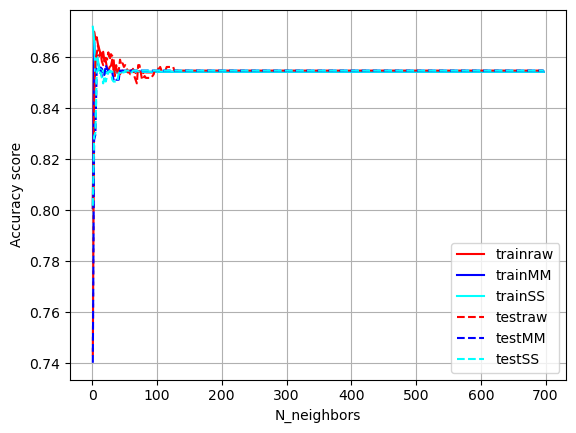

In [21]:
# visualize accuracies for different C-values
color_map = {"raw":'red',
             "MM":"blue",
             "SS":"cyan"}
plt.figure()
for key,vlist in train_acc.items():
    plt.plot(NN_values, vlist,  color=color_map[key],label='train'+key)
for key,vlist in test_acc.items():
    plt.plot(NN_values, vlist, ls="--", color=color_map[key],label='test'+key)
plt.xlabel('N_neighbors')
plt.ylabel('Accuracy score')
plt.legend()
plt.grid()
plt.show()

### KNN test results, best test was 86.5 percent accuracte which is around the highest I could get on my logistic regression.

### Same thing, need to fix my datasets null values.

In [22]:
from sklearn.decomposition import PCA

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#scale
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

#decompose
pca = PCA(n_components=3)
pca.fit(X_train)
X_train = pca.transform(X_train)

#fit
knn = KNeighborsClassifier(n_neighbors=13)
model = knn.fit(X_train, y_train)

print(f"The Train score is: {model.score(X_train, y_train)}")

The Train score is: 0.8568019093078759


In [24]:
# Carve out exactly the same train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)
model.score(X_test, y_test)

0.8461538461538461

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

estimators = [('normalise', StandardScaler()),
              ('model', LogisticRegression())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [LogisticRegression()], 
             'normalise': [StandardScaler(), None],
             'model__penalty': ['l1', 'l2'],
             'model__solver': ['saga', 'liblinear'],
             'model__C': [0.001, 0.01, 0.1, 1, 10, 100]},
            {'model': [DecisionTreeClassifier()],
             'normalise': [None], 'model__max_depth': [1, 2, 3]}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid = grid.fit(X_train, y_train)

C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [27]:
fittedgrid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('normalise', StandardScaler()),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression(C=10, penalty='l1',
                                                       solver='saga')],
                          'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'model__penalty': ['l1', 'l2'],
                          'model__solver': ['saga', 'liblinear'],
                          'normalise': [StandardScaler(), None]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [1, 2, 3], 'normalise': [None]}])

In [28]:
fittedgrid.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('model',
                 LogisticRegression(C=10, penalty='l1', solver='saga'))])

In [29]:
fittedgrid.best_params_

{'model': LogisticRegression(C=10, penalty='l1', solver='saga'),
 'model__C': 10,
 'model__penalty': 'l1',
 'model__solver': 'saga',
 'normalise': StandardScaler()}

In [30]:
fittedgrid.cv_results_['mean_test_score']

array([0.85680183, 0.85680183, 0.85680183, 0.85680183, 0.85680183,
       0.85680183, 0.85680183, 0.85680183, 0.85680183, 0.85680183,
       0.85680183, 0.85680183, 0.85680183, 0.85680183, 0.85680183,
       0.85680183, 0.85680183, 0.85680183, 0.85680183, 0.85680183,
       0.8559072 , 0.85680183, 0.8559072 , 0.85680183, 0.85620526,
       0.85680183, 0.85620526, 0.85680183, 0.85620526, 0.85680183,
       0.85620526, 0.85680183, 0.85680228, 0.85680183, 0.85680228,
       0.85680183, 0.85680228, 0.85680183, 0.85680228, 0.85680183,
       0.85680228, 0.85680183, 0.85680228, 0.85680183, 0.85680228,
       0.85680183, 0.85680228, 0.85650333, 0.85680183, 0.85680183,
       0.85441377])

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# tested a neural network 

In [32]:
# random seeds for reproducibility
tf.random.set_seed(1111)

# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(5, activation="relu"))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

In [33]:
model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [34]:
history = model.fit(X_train, y_train, epochs=400, verbose=1)

Epoch 1/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 851us/step - binary_accuracy: 0.8539 - loss: 0.6841
Epoch 2/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - binary_accuracy: 0.8539 - loss: 0.6501
Epoch 3/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - binary_accuracy: 0.8539 - loss: 0.6199
Epoch 4/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - binary_accuracy: 0.8539 - loss: 0.5931
Epoch 5/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - binary_accuracy: 0.8539 - loss: 0.5694
Epoch 6/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - binary_accuracy: 0.8539 - loss: 0.5485
Epoch 7/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - binary_accuracy: 0.8539 - loss: 0.5302
Epoch 8/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - binary_accuracy: 0.8539 - loss: 0.5141
Epoch 9/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - binary_accuracy: 0.8539 - loss: 0.5000
Epoch 10/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - binary_accuracy: 0.8539 - loss: 0.4877
Epoch 11/400
105/105 ━━━━━━━━━━━━━━━━━━

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 126/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 127/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 128/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 129/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 130/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 131/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 132/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 133/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 134/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 135/400
105/105 ━━━━━━━━━━━━

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 250/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 251/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 252/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 253/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 254/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 255/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 256/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 257/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 258/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 259/400
105/105 ━━━━━━━━━━━━

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 374/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 375/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 376/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 377/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 378/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 379/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 380/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 381/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 382/400
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - binary_accuracy: 0.8539 - loss: 0.4159
Epoch 383/400
105/105 ━━━━━━━━━━━━

### Had a very poor accuracy score

### Decided to change up the tests

# Now we try each dataframe separated by position

# Outside Hitter <a class="anchor" id ="oh"></a>

In [160]:
oh_df = pd.read_csv('outside_df').drop(columns = ['Unnamed: 0'])

In [161]:
oh_df

,Height_cm,Pro,School_ PFW,School_BYU,School_Ball State,School_CSUN,School_Daemen_University,School_GCU,School_Harvard,School_LBS,...,School_Pepperdine,School_Princeton,School_SFU,School_Stanford,School_UCI,School_UCLA,School_UCSB,School_UCSD,School_UH,School_USC
0,203.20000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,190.50000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,190.50000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,200.66000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,201.00000,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,195.00000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2213,192.48164,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2214,206.00000,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2215,197.00000,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
oh_df['Pro'].mean()

0.12674785746504286

In [163]:
print(0.12674785746504286 - 1)

-0.8732521425349571


### There is a 87.325 percent chance of guessing correctly by just guessing they aren't pro.

In [164]:
X = oh_df.drop(columns = ['Pro']) # independent variables or features
y = oh_df['Pro'] # dependent variable or target

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=3,
                                                    stratify=y)

# Check 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1485, 28) (732, 28) (1485,) (732,)


# Running a more robust grid search to find the best classifier and hyper parameters

In [166]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB



classifiers = {
    'Logistic Regression': (LogisticRegression(),
                            {'clf__penalty': ['l1', 'l2'],
                             'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    'K Nearest Neighbors': (KNeighborsClassifier(),
                            {'clf__n_neighbors': range(1, 21),
                             'clf__weights': ['uniform', 'distance']}),
    'Random Forest Classifier': (RandomForestClassifier(),
                                 {'clf__n_estimators': [50, 100, 200],
                                  'clf__max_depth': [None, 10, 20, 30],
                                  'clf__min_samples_split': [2, 5, 10],
                                  'clf__min_samples_leaf': [1, 2, 4]}),
    'Decision Tree Classifier': (DecisionTreeClassifier(),
                                 {'clf__criterion': ['gini', 'entropy'],
                                  'clf__max_depth': [None, 10, 20, 30],
                                  'clf__min_samples_split': [2, 5, 10],
                                  'clf__min_samples_leaf': [1, 2, 4]}),
    'Naive Bayes Classifier': (GaussianNB(),
                               {'clf__var_smoothing': np.logspace(0, -9, num=100)})
}

# Perform GridSearchCV for each classifier
results = {}
for clf_name, (clf, param_grid) in classifiers.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    gs = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    gs.fit(X_train, y_train)
    results[clf_name] = gs
    
for clf_name, gs in results.items():
    print(f"{clf_name}:")
    print(f"Best parameters: {gs.best_params_}")
    print(f"Best cross-validation accuracy: {gs.best_score_:.4f}")
    print()


Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Logistic Regression:
Best parameters: {'clf__C': 0.001, 'clf__penalty': 'l2'}
Best cross-validation accuracy: 0.8734

K Nearest Neighbors:
Best parameters: {'clf__n_neighbors': 19, 'clf__weights': 'distance'}
Best cross-validation accuracy: 0.8761

Random Forest Classifier:
Best parameters: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 50}
Best cross-validation accuracy: 0.8788

Decision Tree Classifier:
Best parameters: {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best cross-validation accuracy: 0.8862

Naive Bayes Classifier:
Best parameters: {'clf__var_smoothing': 1.0}
Best cross-validation accuracy: 0.3616



### Best classifier was Decision tree

In [167]:
DT_model_oh = DecisionTreeClassifier(criterion='entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split= 2)
DT_model_oh.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

### Changed some of the parameters to increase the test score and reduce over fitting 

In [168]:
print(f"The TRAIN classification accuracy is:  {DT_model_oh.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {DT_model_oh.score(X_test,y_test)}")

The TRAIN classification accuracy is:  0.9117845117845118
The TEST classification accuracy is:  0.8920765027322405


In [169]:
y_pred = DT_model_oh.predict(X_test)

In [170]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = DT_model_oh.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Non-Pro", "Predicted Pro"],
    index=["True Non-Pro", "True Pro"]
)

display(cf_df)

,Predicted Non-Pro,Predicted Pro
True Non-Pro,634,5
True Pro,74,19


### Created a confusion matrix to make sure it wasnt just guessing not pro for each entry

In [171]:
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print()
    
    # Generate confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print()
    
    # Generate classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

In [172]:
evaluate_model(DT_model_oh, X_test, y_test)

Accuracy: 0.89

Confusion Matrix:
[[634   5]
 [ 74  19]]

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.99      0.94       639
        True       0.79      0.20      0.32        93

    accuracy                           0.89       732
   macro avg       0.84      0.60      0.63       732
weighted avg       0.88      0.89      0.86       732



# 89 Percent accuracy 

In [173]:
importances = DT_model_oh.feature_importances_
feature_names = X_train.columns

In [174]:
importances

array([0.6328853 , 0.00537642, 0.00273503, 0.01594775, 0.01280306,
       0.        , 0.00599053, 0.00882783, 0.03101387, 0.        ,
       0.        , 0.03177139, 0.00790028, 0.        , 0.00529576,
       0.        , 0.05827735, 0.03987278, 0.01578318, 0.01291209,
       0.00297886, 0.00651363, 0.00426218, 0.0045445 , 0.03466349,
       0.0256753 , 0.02126179, 0.01270763])

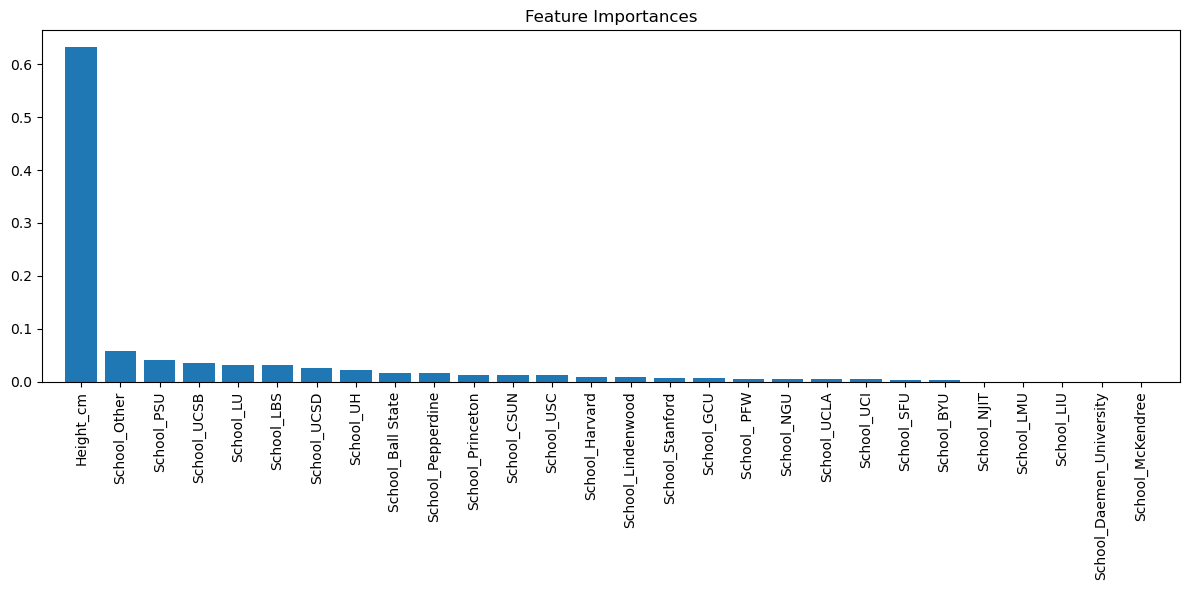

In [175]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Key takeways
### For outside hitter the most important features were height and the school 'PSU'. 'Other' is the remaining schools that haven't been included due to time constraints.

### The results lead me to believe that the school you attend for your position has an impact on your chances of going  pro.

In [ ]:
import joblib

# Save the model
joblib.dump(DT_model_oh, 'decision_tree_model_oh.pkl')

# Opposite Hitter <a class="anchor" id ="opp"></a>

In [177]:
opp_df = pd.read_csv('opposite_df').drop(columns = ['Unnamed: 0'])

In [178]:
opp_df

,Height_cm,Pro,School_ PFW,School_BYU,School_Ball State,School_CSUN,School_Daemen_University,School_GCU,School_Harvard,School_LBS,...,School_Pepperdine,School_Princeton,School_SFU,School_Stanford,School_UCI,School_UCLA,School_UCSB,School_UCSD,School_UH,School_USC
0,201.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,195.58,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,190.50,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,196.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,195.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,193.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660,205.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
661,196.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
662,203.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
opp_df['Pro'].mean()

0.17319277108433734

In [180]:
print(0.17319277108433734 - 1)

-0.8268072289156627


### 82.6% baseline accuracy

In [181]:
X = opp_df.drop(columns = ['Pro']) # independent variables or features
y = opp_df['Pro'] # dependent variable or target

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=3,
                                                    stratify=y)

# Check 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(444, 28) (220, 28) (444,) (220,)


# Grid search 

In [183]:
classifiers = {
    'Logistic Regression': (LogisticRegression(),
                            {'clf__penalty': ['l1', 'l2'],
                             'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    'K Nearest Neighbors': (KNeighborsClassifier(),
                            {'clf__n_neighbors': range(1, 21),
                             'clf__weights': ['uniform', 'distance']}),
    'Random Forest Classifier': (RandomForestClassifier(),
                                 {'clf__n_estimators': [50, 100, 200],
                                  'clf__max_depth': [None, 10, 20, 30],
                                  'clf__min_samples_split': [2, 5, 10],
                                  'clf__min_samples_leaf': [1, 2, 4]}),
    'Decision Tree Classifier': (DecisionTreeClassifier(),
                                 {'clf__criterion': ['gini', 'entropy'],
                                  'clf__max_depth': [None, 10, 20, 30],
                                  'clf__min_samples_split': [2, 5, 10],
                                  'clf__min_samples_leaf': [1, 2, 4]}),
    'Naive Bayes Classifier': (GaussianNB(),
                               {'clf__var_smoothing': np.logspace(0, -9, num=100)})
}

# Perform GridSearchCV for each classifier
results = {}
for clf_name, (clf, param_grid) in classifiers.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    gs = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    gs.fit(X_train, y_train)
    results[clf_name] = gs
    
for clf_name, gs in results.items():
    print(f"{clf_name}:")
    print(f"Best parameters: {gs.best_params_}")
    print(f"Best cross-validation accuracy: {gs.best_score_:.4f}")
    print()


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, 

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Logistic Regression:
Best parameters: {'clf__C': 0.001, 'clf__penalty': 'l2'}
Best cross-validation accuracy: 0.8266

K Nearest Neighbors:
Best parameters: {'clf__n_neighbors': 16, 'clf__weights': 'distance'}
Best cross-validation accuracy: 0.8288

Random Forest Classifier:
Best parameters: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Best cross-validation accuracy: 0.8378

Decision Tree Classifier:
Best parameters: {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best cross-validation accuracy: 0.8559

Naive Bayes Classifier:
Best parameters: {'clf__var_smoothing': 1.0}
Best cross-validation accuracy: 0.5382



In [236]:
DT_model_opp = DecisionTreeClassifier(criterion='gini', max_depth= None, min_samples_leaf= 2, min_samples_split= 2)
DT_model_opp.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2)

In [237]:
print(f"The TRAIN classification accuracy is:  {DT_model_opp.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {DT_model_opp.score(X_test,y_test)}")

The TRAIN classification accuracy is:  0.8896396396396397
The TEST classification accuracy is:  0.8272727272727273


### Training accuracy was much better than test, test is barely better than baseline, however it's the best model.

In [188]:
y_pred = DT_model_oh.predict(X_test)

In [230]:
rfc_opp = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)

RandomForestClassifier(n_estimators=250)

### Tried random forest but it was worse.

In [231]:
print(f"The TRAIN classification accuracy is:  {rfc_opp.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {rfc_opp.score(X_test,y_test)}")

The TRAIN classification accuracy is:  0.9121621621621622
The TEST classification accuracy is:  0.8045454545454546


In [238]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = DT_model_opp.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Non-Pro", "Predicted Pro"],
    index=["True Non-Pro", "True Pro"]
)

display(cf_df)

,Predicted Non-Pro,Predicted Pro
True Non-Pro,176,6
True Pro,32,6


### Confusion matrix does display the model is capable of guessing some trues correctly.

In [239]:
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print()
    
    # Generate confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print()
    
    # Generate classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

In [240]:
evaluate_model(DT_model_opp, X_test, y_test)

Accuracy: 0.83

Confusion Matrix:
[[176   6]
 [ 32   6]]

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.97      0.90       182
        True       0.50      0.16      0.24        38

    accuracy                           0.83       220
   macro avg       0.67      0.56      0.57       220
weighted avg       0.79      0.83      0.79       220



In [241]:
importances = DT_model_opp.feature_importances_
feature_names = X_train.columns

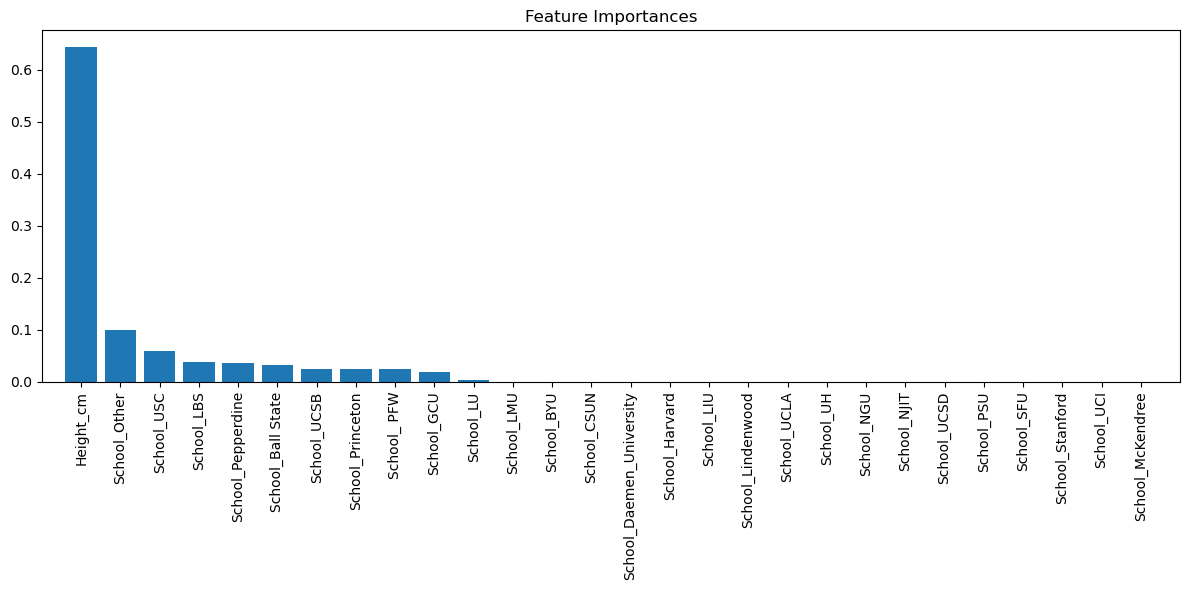

In [242]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Key takeaways
### similar to outside hitters, height was a similar importance, however it looks like the school 'USC' Has a greater impact on whether or not you go pro as an opposite hitter.

In [244]:
# Save the model
joblib.dump(DT_model_opp, 'decision_tree_model_opp.pkl')

['decision_tree_model_opp.pkl']

# Middle Blocker <a class="anchor" id ="mb"></a>

In [246]:
mid_df = pd.read_csv('middle_df').drop(columns = ['Unnamed: 0'])

In [247]:
mid_df

,Height_cm,Pro,School_ PFW,School_BYU,School_Ball State,School_CSUN,School_Daemen_University,School_GCU,School_Harvard,School_LBS,...,School_Pepperdine,School_Princeton,School_SFU,School_Stanford,School_UCI,School_UCLA,School_UCSB,School_UCSD,School_UH,School_USC
0,195.58,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,206.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,203.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,203.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,201.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,208.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1231,203.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1232,202.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1233,203.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [248]:
mid_df['Pro'].mean()

0.17813765182186234

In [249]:
print(0.17813765182186234 - 1)

-0.8218623481781376


# 82.1% Baseline accuracy

In [279]:
X = mid_df.drop(columns = ['Pro']) # independent variables or features
y = mid_df['Pro'] # dependent variable or target

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=3,
                                                    stratify=y)

# Check 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(827, 28) (408, 28) (827,) (408,)


In [252]:
classifiers = {
    'Logistic Regression': (LogisticRegression(),
                            {'clf__penalty': ['l1', 'l2'],
                             'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    'K Nearest Neighbors': (KNeighborsClassifier(),
                            {'clf__n_neighbors': range(1, 21),
                             'clf__weights': ['uniform', 'distance']}),
    'Random Forest Classifier': (RandomForestClassifier(),
                                 {'clf__n_estimators': [50, 100, 200],
                                  'clf__max_depth': [None, 10, 20, 30],
                                  'clf__min_samples_split': [2, 5, 10],
                                  'clf__min_samples_leaf': [1, 2, 4]}),
    'Decision Tree Classifier': (DecisionTreeClassifier(),
                                 {'clf__criterion': ['gini', 'entropy'],
                                  'clf__max_depth': [None, 10, 20, 30],
                                  'clf__min_samples_split': [2, 5, 10],
                                  'clf__min_samples_leaf': [1, 2, 4]}),
    'Naive Bayes Classifier': (GaussianNB(),
                               {'clf__var_smoothing': np.logspace(0, -9, num=100)})
}

# Perform GridSearchCV for each classifier
results = {}
for clf_name, (clf, param_grid) in classifiers.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    gs = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    gs.fit(X_train, y_train)
    results[clf_name] = gs
    
for clf_name, gs in results.items():
    print(f"{clf_name}:")
    print(f"Best parameters: {gs.best_params_}")
    print(f"Best cross-validation accuracy: {gs.best_score_:.4f}")
    print()


Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Logistic Regression:
Best parameters: {'clf__C': 1, 'clf__penalty': 'l2'}
Best cross-validation accuracy: 0.8258

K Nearest Neighbors:
Best parameters: {'clf__n_neighbors': 16, 'clf__weights': 'distance'}
Best cross-validation accuracy: 0.8319

Random Forest Classifier:
Best parameters: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Best cross-validation accuracy: 0.8428

Decision Tree Classifier:
Best parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best cross-validation accuracy: 0.8513

Naive Bayes Classifier:
Best parameters: {'clf__var_smoothing': 1.0}
Best cross-validation accuracy: 0.4776



In [273]:
DT_model_mid = DecisionTreeClassifier(criterion='entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 2)
DT_model_mid.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [274]:
print(f"The TRAIN classification accuracy is:  {DT_model_mid.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {DT_model_mid.score(X_test,y_test)}")

The TRAIN classification accuracy is:  0.898428053204353
The TEST classification accuracy is:  0.8284313725490197


# Again only about a percent increase in accuracy

In [278]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = DT_model_mid.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Non-Pro", "Predicted Pro"],
    index=["True Non-Pro", "True Pro"]
)

display(cf_df)

,Predicted Non-Pro,Predicted Pro
True Non-Pro,314,21
True Pro,49,24


### was able to correctly identify true pro

In [277]:
evaluate_model(DT_model_mid, X_test, y_test)

Accuracy: 0.83

Confusion Matrix:
[[314  21]
 [ 49  24]]

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.94      0.90       335
        True       0.53      0.33      0.41        73

    accuracy                           0.83       408
   macro avg       0.70      0.63      0.65       408
weighted avg       0.81      0.83      0.81       408



In [282]:
importances = DT_model_mid.feature_importances_
feature_names = X_train.columns

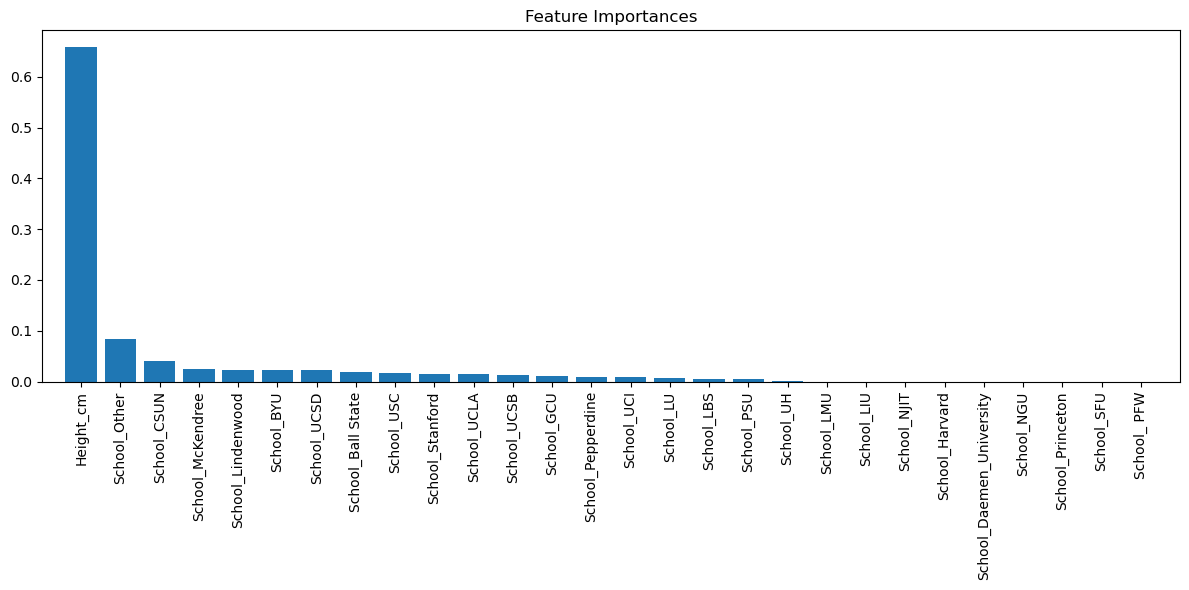

In [283]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Key takeaways
### Height was a lot more important of a feature than every other position, with 'CSUN' having the most impact on middles compared to other schools.

In [285]:
# Save the model
joblib.dump(DT_model_mid, 'decision_tree_model_mid.pkl')

['decision_tree_model_mid.pkl']

# Setter <a class="anchor" id ="set"></a>

In [286]:
set_df = pd.read_csv('setter_df').drop(columns = ['Unnamed: 0'])

In [287]:
set_df

,Height_cm,Pro,School_ PFW,School_BYU,School_Ball State,School_CSUN,School_Daemen_University,School_GCU,School_Harvard,School_LBS,...,School_Pepperdine,School_Princeton,School_SFU,School_Stanford,School_UCI,School_UCLA,School_UCSB,School_UCSD,School_UH,School_USC
0,188.00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,200.66,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,208.28,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,195.58,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,192.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,196.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,190.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,203.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799,194.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [288]:
set_df['Pro'].mean()

0.14107365792759052

In [289]:
print(0.14107365792759052 - 1)

-0.8589263420724095


# 85.8% baseline

In [324]:
X = set_df.drop(columns = ['Pro']) # independent variables or features
y = set_df['Pro'] # dependent variable or target

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=3,
                                                    stratify=y)

# Check 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(536, 27) (265, 27) (536,) (265,)


In [326]:
classifiers = {
    'Logistic Regression': (LogisticRegression(),
                            {'clf__penalty': ['l1', 'l2'],
                             'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    'K Nearest Neighbors': (KNeighborsClassifier(),
                            {'clf__n_neighbors': range(1, 21),
                             'clf__weights': ['uniform', 'distance']}),
    'Random Forest Classifier': (RandomForestClassifier(),
                                 {'clf__n_estimators': [50, 100, 200],
                                  'clf__max_depth': [None, 10, 20, 30],
                                  'clf__min_samples_split': [2, 5, 10],
                                  'clf__min_samples_leaf': [1, 2, 4]}),
    'Decision Tree Classifier': (DecisionTreeClassifier(),
                                 {'clf__criterion': ['gini', 'entropy'],
                                  'clf__max_depth': [None, 10, 20, 30],
                                  'clf__min_samples_split': [2, 5, 10],
                                  'clf__min_samples_leaf': [1, 2, 4]}),
    'Naive Bayes Classifier': (GaussianNB(),
                               {'clf__var_smoothing': np.logspace(0, -9, num=100)})
}

# Perform GridSearchCV for each classifier
results = {}
for clf_name, (clf, param_grid) in classifiers.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    gs = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    gs.fit(X_train, y_train)
    results[clf_name] = gs
    
for clf_name, gs in results.items():
    print(f"{clf_name}:")
    print(f"Best parameters: {gs.best_params_}")
    print(f"Best cross-validation accuracy: {gs.best_score_:.4f}")
    print()


Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Logistic Regression:
Best parameters: {'clf__C': 0.001, 'clf__penalty': 'l2'}
Best cross-validation accuracy: 0.8582

K Nearest Neighbors:
Best parameters: {'clf__n_neighbors': 20, 'clf__weights': 'uniform'}
Best cross-validation accuracy: 0.8564

Random Forest Classifier:
Best parameters: {'clf__max_depth': None, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 10, 'clf__n_estimators': 100}
Best cross-validation accuracy: 0.8545

Decision Tree Classifier:
Best parameters: {'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2}
Best cross-validation accuracy: 0.8377

Naive Bayes Classifier:
Best parameters: {'clf__var_smoothing': 0.43287612810830584}
Best cross-validation accuracy: 0.

In [327]:
knn_set = KNeighborsClassifier(n_neighbors=20, weights= 'uniform')

In [328]:
knn_set.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [329]:
print(f"The TRAIN classification accuracy is:  {knn_set.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {knn_set.score(X_test,y_test)}")

The TRAIN classification accuracy is:  0.8582089552238806
The TEST classification accuracy is:  0.8603773584905661


In [333]:
DT_model_set = DecisionTreeClassifier(criterion='entropy', max_depth= None, min_samples_leaf= 2, min_samples_split= 2)
DT_model_set.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [334]:
print(f"The TRAIN classification accuracy is:  {DT_model_set.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {DT_model_set.score(X_test,y_test)}")

The TRAIN classification accuracy is:  0.8917910447761194
The TEST classification accuracy is:  0.8679245283018868


# Tested several classifiers after seeing the grid search scores, but it still looks like decision tree outperformed.

In [335]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = DT_model_set.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Non-Pro", "Predicted Pro"],
    index=["True Non-Pro", "True Pro"]
)

display(cf_df)

,Predicted Non-Pro,Predicted Pro
True Non-Pro,224,4
True Pro,31,6


In [293]:
rfc_set = RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50)

In [295]:
rfc_set.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, n_estimators=50)

In [296]:
print(f"The TRAIN classification accuracy is:  {rfc_set.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {rfc_set.score(X_test,y_test)}")

The TRAIN classification accuracy is:  0.8582089552238806
The TEST classification accuracy is:  0.8603773584905661


In [297]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = rfc_set.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Non-Pro", "Predicted Pro"],
    index=["True Non-Pro", "True Pro"]
)

display(cf_df)

,Predicted Non-Pro,Predicted Pro
True Non-Pro,228,0
True Pro,37,0


In [336]:
evaluate_model(DT_model_set, X_test, y_test)

Accuracy: 0.87

Confusion Matrix:
[[224   4]
 [ 31   6]]

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.98      0.93       228
        True       0.60      0.16      0.26        37

    accuracy                           0.87       265
   macro avg       0.74      0.57      0.59       265
weighted avg       0.84      0.87      0.83       265



In [337]:
importances = DT_model_set.feature_importances_
feature_names = X_train.columns

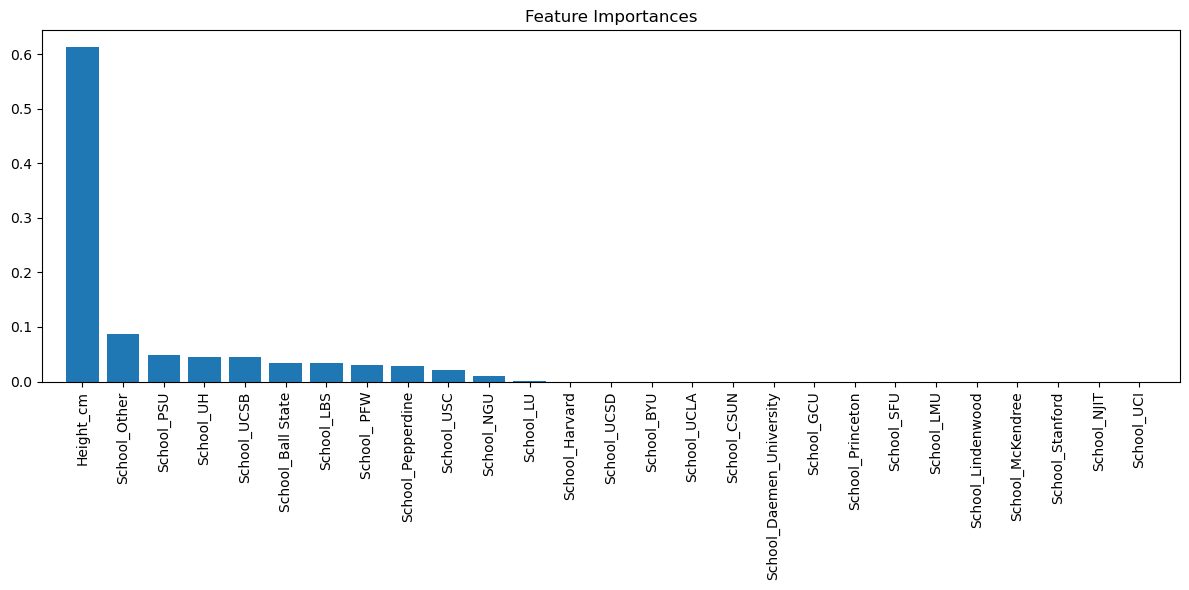

In [338]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

### Height mattered a little less than it did for opposites or outside hitter but was comprable, with 'PSU' being the main school for setters, almost tied with 'UH' and 'UCSB'.

In [306]:
# Save the model
joblib.dump(rfc_set, 'random_forest_set.pkl')

['random_forest_set.pkl']

# Libero <a class="anchor" id ="lib"></a>

In [307]:
lib_df = pd.read_csv('libero_df').drop(columns = ['Unnamed: 0'])

In [308]:
lib_df

,Height_cm,Pro,School_ PFW,School_BYU,School_Ball State,School_CSUN,School_Daemen_University,School_GCU,School_Harvard,School_LBS,...,School_Pepperdine,School_Princeton,School_SFU,School_Stanford,School_UCI,School_UCLA,School_UCSB,School_UCSD,School_UH,School_USC
0,188.00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,180.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,188.00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,172.72,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,182.88,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,184.00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,178.00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,193.00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,190.00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [309]:
lib_df['Pro'].mean()

0.12667660208643816

In [310]:
print(0.12667660208643816 - 1)

-0.8733233979135618


# 87.33 Baseline accuracy

In [311]:
X = lib_df.drop(columns = ['Pro']) # independent variables or features
y = lib_df['Pro'] # dependent variable or target

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=3,
                                                    stratify=y)

# Check 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(449, 28) (222, 28) (449,) (222,)


In [313]:
classifiers = {
    'Logistic Regression': (LogisticRegression(),
                            {'clf__penalty': ['l1', 'l2'],
                             'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    'K Nearest Neighbors': (KNeighborsClassifier(),
                            {'clf__n_neighbors': range(1, 21),
                             'clf__weights': ['uniform', 'distance']}),
    'Random Forest Classifier': (RandomForestClassifier(),
                                 {'clf__n_estimators': [50, 100, 200],
                                  'clf__max_depth': [None, 10, 20, 30],
                                  'clf__min_samples_split': [2, 5, 10],
                                  'clf__min_samples_leaf': [1, 2, 4]}),
    'Decision Tree Classifier': (DecisionTreeClassifier(),
                                 {'clf__criterion': ['gini', 'entropy'],
                                  'clf__max_depth': [None, 10, 20, 30],
                                  'clf__min_samples_split': [2, 5, 10],
                                  'clf__min_samples_leaf': [1, 2, 4]}),
    'Naive Bayes Classifier': (GaussianNB(),
                               {'clf__var_smoothing': np.logspace(0, -9, num=100)})
}

# Perform GridSearchCV for each classifier
results = {}
for clf_name, (clf, param_grid) in classifiers.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    gs = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    gs.fit(X_train, y_train)
    results[clf_name] = gs
    
for clf_name, gs in results.items():
    print(f"{clf_name}:")
    print(f"Best parameters: {gs.best_params_}")
    print(f"Best cross-validation accuracy: {gs.best_score_:.4f}")
    print()


Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\acdaa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Logistic Regression:
Best parameters: {'clf__C': 0.001, 'clf__penalty': 'l2'}
Best cross-validation accuracy: 0.8731

K Nearest Neighbors:
Best parameters: {'clf__n_neighbors': 11, 'clf__weights': 'distance'}
Best cross-validation accuracy: 0.8931

Random Forest Classifier:
Best parameters: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Best cross-validation accuracy: 0.8887

Decision Tree Classifier:
Best parameters: {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best cross-validation accuracy: 0.8908

Naive Bayes Classifier:
Best parameters: {'clf__var_smoothing': 1.0}
Best cross-validation accuracy: 0.4876



In [314]:
DT_model_lib = DecisionTreeClassifier(criterion='entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 2)
DT_model_lib.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [315]:
print(f"The TRAIN classification accuracy is:  {DT_model_lib.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {DT_model_lib.score(X_test,y_test)}")

The TRAIN classification accuracy is:  0.9465478841870824
The TEST classification accuracy is:  0.8873873873873874


# decision tree has a percent and a half better accuracy on the test score than baseline.

In [316]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = DT_model_lib.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Non-Pro", "Predicted Pro"],
    index=["True Non-Pro", "True Pro"]
)

display(cf_df)

,Predicted Non-Pro,Predicted Pro
True Non-Pro,191,3
True Pro,22,6


In [317]:
evaluate_model(DT_model_lib, X_test, y_test)

Accuracy: 0.89

Confusion Matrix:
[[191   3]
 [ 22   6]]

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.98      0.94       194
        True       0.67      0.21      0.32        28

    accuracy                           0.89       222
   macro avg       0.78      0.60      0.63       222
weighted avg       0.87      0.89      0.86       222



In [318]:
importances = DT_model_lib.feature_importances_
feature_names = X_train.columns

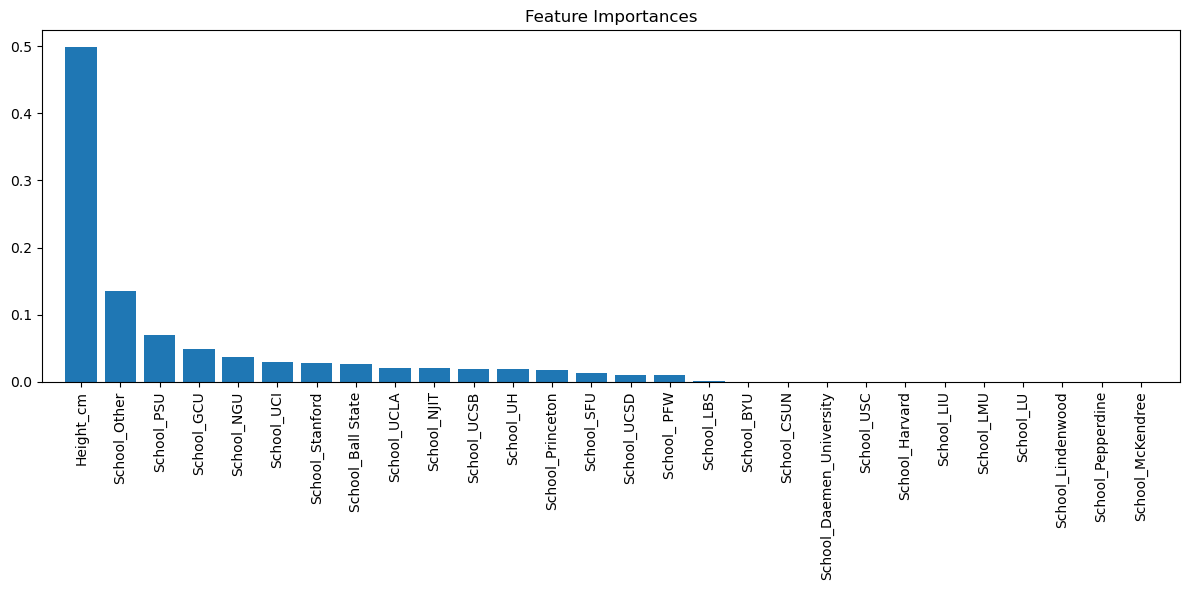

In [319]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Key Takeways 
### Height matters significantly less than the other positions, which makes sense because the libero is supposed to be the best passer on the team and is usually the shortest player. 'PSU' was the school that had the most impact.

In [320]:
# Save the model
joblib.dump(DT_model_lib, 'decision_tree_model_lib.pkl')

['decision_tree_model_lib.pkl']

# Conclusion

### The features that were most important to predicting pro or not pro varied by position. The most important across the board was height, but the weight differed by position. Setters, opposites, and outsides had similar importance scores when it came to height. Height mattered the most for middle blockers, and it mattered the least amount for liberos. Great insight to take from these tests was different schools had higher degress of importance for each position. This means that either the coaching or something the schools were doing helped produce increased the odds of certain positions going pro compared to other positions.